# Generate images from text phrases with VQGAN and CLIP (z + quantize method with augmentations).

Notebook by Katherine Crowson (https://github.com/crowsonkb, https://twitter.com/RiversHaveWings). The original BigGAN + CLIP method was made by https://twitter.com/advadnoun. Translated and added explanations, and modifications by Eleiber # 8347, and the friendly interface was made thanks to Abulafia # 3734.

For a detailed tutorial on how to use it, I recommend [visit this article] (https://yourcriatures.miraheze.org/wiki/Help:Create_images_with_VQGAN+CLIP), made by Jakeukalane # 2767 and Avengium (Angel) # 3715

Modified by: Justin John


In [1]:
#@markdown #**Licensed under the MIT License (*Double-click me to read the license agreement*)**
#@markdown ---

# Copyright (c) 2021 Katherine Crowson

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
# THE SOFTWARE.

In [2]:
#@markdown #**Check GPU type**
#@markdown ### Factory reset runtime if you don't have the desired GPU.

#@markdown ---




#@markdown V100 = Excellent (*Available only for Colab Pro users*)

#@markdown P100 = Very Good

#@markdown T4 = Good (*preferred*)

#@markdown K80 = Meh

#@markdown P4 = (*Not Recommended*) 

#@markdown ---

!nvidia-smi -L

GPU 0: NVIDIA A100-SXM4-40GB (UUID: GPU-1a9bbbb5-cc83-4eb5-20c7-42c0314594b9)


In [30]:
!pip install git+https://github.com/CompVis/taming-transformers 

  Cloning https://github.com/CompVis/taming-transformers to /tmp/pip-req-build-pzp6zxqt
  Running command git clone -q https://github.com/CompVis/taming-transformers /tmp/pip-req-build-pzp6zxqt
  Resolved https://github.com/CompVis/taming-transformers to commit 9d17ea64b820f7633ea6b8823e1f78729447cb57
  Created wheel for taming-transformers: filename=taming_transformers-0.0.1-py3-none-any.whl size=1148 sha256=7c89ac92e44377063a01ddd4fccaf226a7f1b9c1878e021e9f6c482a76307e59
  Stored in directory: /tmp/pip-ephem-wheel-cache-9ghr8j0h/wheels/07/87/68/4f000694e2e9af2849c2b4b6662045930a35182069e2003f26
Successfully built taming-transformers


In [31]:
!pip install git+https://github.com/openai/CLIP                

  Cloning https://github.com/openai/CLIP to /tmp/pip-req-build-7t77xfqt
  Running command git clone -q https://github.com/openai/CLIP /tmp/pip-req-build-7t77xfqt
  Resolved https://github.com/openai/CLIP to commit 3b473b0e682c091a9e53623eebc1ca1657385717
     |████████████████████████████████| 22.1 MB 27.3 MB/s eta 0:00:01
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369079 sha256=c2726aa358b2a380400f15311b474c188828c4c4caa562b475b1f9d995dbaf86
  Stored in directory: /tmp/pip-ephem-wheel-cache-97llqpsp/wheels/bb/76/0a/b7e2c0ca487c98861e281911aa22ca8a2028765d47f7b6fa46
Successfully built clip


In [12]:
!pip install torch==1.7.1 # https://download.pytorch.org/whl/cu110/torch-1.7.1%2Bcu110-cp36-cp36m-linux_x86_64.whl

     |████████████████████████████████| 776.8 MB 14 kB/s s eta 0:00:01     |███████████████                 | 365.3 MB 32.4 MB/s eta 0:00:13     |████████████████▍               | 398.3 MB 28.7 MB/s eta 0:00:14     |████████████████████▏           | 490.1 MB 52.3 MB/s eta 0:00:06     |████████████████████▉           | 505.9 MB 52.3 MB/s eta 0:00:06     |███████████████████████▌        | 571.2 MB 43.5 MB/s eta 0:00:05     |███████████████████████▊        | 575.8 MB 43.5 MB/s eta 0:00:05
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0
    Uninstalling torch-1.9.0:
      Successfully uninstalled torch-1.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.10.0 requires torch==1.9.0, but you have torch 1.7.1 which is incompatible.


In [26]:
#@markdown #**Installation of libraries**
# @markdown This cell will take a little while because it has to download several libraries

#@markdown ---
 
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html
print("Installing CLIP...")
!git clone https://github.com/openai/CLIP                
 
print("Installing Python Libraries for AI...")
!git clone https://github.com/CompVis/taming-transformers 
!pip install transformers                                
!pip install ftfy regex tqdm omegaconf pytorch-lightning 
!pip install kornia                                      
!pip install einops                                      
!pip install wget                                        
 
print("Installing libraries for metadata management...")
!pip install stegano                                     
!apt install exempi curl -y                                      
!pip install python-xmp-toolkit                          
!pip install imgtag                                      
!pip install pillow==7.1.2                               
 
print("Installing Python libraries for creating videos...")
!pip install imageio                            
!mkdir steps
print("Installation completed.")

Installing CLIP...
fatal: destination path 'CLIP' already exists and is not an empty directory.
Installing Python Libraries for AI...
fatal: destination path 'taming-transformers' already exists and is not an empty directory.
Installing libraries for metadata management...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libexempi8
The following NEW packages will be installed:
  exempi libexempi8
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 539 kB of archives.
After this operation, 1649 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libexempi8 amd64 2.5.1-1build1 [528 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 exempi amd64 2.5.1-1build1 [10.3 kB]
Fetched 539 kB in 1s (460 kB/s)  
debconf: delaying package configuration, since apt-utils is not installed

78Selecting previously unsele

In [27]:
#@markdown #**Selection of models to download**
#@markdown ---

#@markdown By default, the notebook downloads Model 16384 from ImageNet. There are others that are not downloaded by default, since it would be in vain if you are not going to use them, so if you want to use them, simply select the models to download.

#@markdown ---

imagenet_1024 = False #@param {type:"boolean"}
imagenet_16384 = True #@param {type:"boolean"}
gumbel_8192 = False #@param {type:"boolean"}
coco = False #@param {type:"boolean"}
faceshq = False #@param {type:"boolean"}
wikiart_1024 = False #@param {type:"boolean"}
wikiart_16384 = False #@param {type:"boolean"}
sflckr = False #@param {type:"boolean"}
ade20k = False #@param {type:"boolean"}
ffhq = False #@param {type:"boolean"}
celebahq = False #@param {type:"boolean"}

if imagenet_1024:
  !curl -L -o vqgan_imagenet_f16_1024.yaml -C - 'https://heibox.uni-heidelberg.de/d/8088892a516d4e3baf92/files/?p=%2Fconfigs%2Fmodel.yaml&dl=1' #ImageNet 1024
  !curl -L -o vqgan_imagenet_f16_1024.ckpt -C - 'https://heibox.uni-heidelberg.de/d/8088892a516d4e3baf92/files/?p=%2Fckpts%2Flast.ckpt&dl=1'  #ImageNet 1024
if imagenet_16384:
  !curl -L -o vqgan_imagenet_f16_16384.yaml -C - 'https://heibox.uni-heidelberg.de/d/a7530b09fed84f80a887/files/?p=%2Fconfigs%2Fmodel.yaml&dl=1' #ImageNet 16384
  !curl -L -o vqgan_imagenet_f16_16384.ckpt -C - 'https://heibox.uni-heidelberg.de/d/a7530b09fed84f80a887/files/?p=%2Fckpts%2Flast.ckpt&dl=1' #ImageNet 16384
if gumbel_8192:
  !curl -L -o gumbel_8192.yaml -C - 'https://heibox.uni-heidelberg.de/d/2e5662443a6b4307b470/files/?p=%2Fconfigs%2Fmodel.yaml&dl=1' #Gumbel 8192
  !curl -L -o gumbel_8192.ckpt -C - 'https://heibox.uni-heidelberg.de/d/2e5662443a6b4307b470/files/?p=%2Fckpts%2Flast.ckpt&dl=1' #Gumbel 8192
if coco:
  !curl -L -o coco.yaml -C - 'https://dl.nmkd.de/ai/clip/coco/coco.yaml' #COCO
  !curl -L -o coco.ckpt -C - 'https://dl.nmkd.de/ai/clip/coco/coco.ckpt' #COCO
if faceshq:
  !curl -L -o faceshq.yaml -C - 'https://drive.google.com/uc?export=download&id=1fHwGx_hnBtC8nsq7hesJvs-Klv-P0gzT' #FacesHQ
  !curl -L -o faceshq.ckpt -C - 'https://app.koofr.net/content/links/a04deec9-0c59-4673-8b37-3d696fe63a5d/files/get/last.ckpt?path=%2F2020-11-13T21-41-45_faceshq_transformer%2Fcheckpoints%2Flast.ckpt' #FacesHQ
if wikiart_1024: 
  !curl -L -o wikiart_1024.yaml -C - 'http://mirror.io.community/blob/vqgan/wikiart.yaml' #WikiArt 1024
  !curl -L -o wikiart_1024.ckpt -C - 'http://mirror.io.community/blob/vqgan/wikiart.ckpt' #WikiArt 1024
if wikiart_16384: 
  !curl -L -o wikiart_16384.yaml -C - 'http://eaidata.bmk.sh/data/Wikiart_16384/wikiart_f16_16384_8145600.yaml' #WikiArt 16384
  !curl -L -o wikiart_16384.ckpt -C - 'http://eaidata.bmk.sh/data/Wikiart_16384/wikiart_f16_16384_8145600.ckpt' #WikiArt 16384
if sflckr:
  !curl -L -o sflckr.yaml -C - 'https://heibox.uni-heidelberg.de/d/73487ab6e5314cb5adba/files/?p=%2Fconfigs%2F2020-11-09T13-31-51-project.yaml&dl=1' #S-FLCKR
  !curl -L -o sflckr.ckpt -C - 'https://heibox.uni-heidelberg.de/d/73487ab6e5314cb5adba/files/?p=%2Fcheckpoints%2Flast.ckpt&dl=1' #S-FLCKR
if ade20k:
  !curl -L -o ade20k.yaml -C - 'https://static.miraheze.org/intercriaturaswiki/b/bf/Ade20k.txt' #ADE20K
  !curl -L -o ade20k.ckpt -C - 'https://app.koofr.net/content/links/0f65c2cd-7102-4550-a2bd-07fd383aac9e/files/get/last.ckpt?path=%2F2020-11-20T21-45-44_ade20k_transformer%2Fcheckpoints%2Flast.ckpt' #ADE20K
if ffhq:
  !curl -L -o ffhq.yaml -C - 'https://app.koofr.net/content/links/0fc005bf-3dca-4079-9d40-cdf38d42cd7a/files/get/2021-04-23T18-19-01-project.yaml?path=%2F2021-04-23T18-19-01_ffhq_transformer%2Fconfigs%2F2021-04-23T18-19-01-project.yaml&force' #FFHQ
  !curl -L -o ffhq.ckpt -C - 'https://app.koofr.net/content/links/0fc005bf-3dca-4079-9d40-cdf38d42cd7a/files/get/last.ckpt?path=%2F2021-04-23T18-19-01_ffhq_transformer%2Fcheckpoints%2Flast.ckpt&force' #FFHQ
if celebahq:
  !curl -L -o celebahq.yaml -C - 'https://app.koofr.net/content/links/6dddf083-40c8-470a-9360-a9dab2a94e96/files/get/2021-04-23T18-11-19-project.yaml?path=%2F2021-04-23T18-11-19_celebahq_transformer%2Fconfigs%2F2021-04-23T18-11-19-project.yaml&force' #CelebA-HQ
  !curl -L -o celebahq.ckpt -C - 'https://app.koofr.net/content/links/6dddf083-40c8-470a-9360-a9dab2a94e96/files/get/last.ckpt?path=%2F2021-04-23T18-11-19_celebahq_transformer%2Fcheckpoints%2Flast.ckpt&force' #CelebA-HQ

** Resuming transfer from byte position 692
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
** Resuming transfer from byte position 980092370
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In [1]:
# @title Loading libraries and definitions
 
import argparse
import math
from pathlib import Path
import sys
 
from IPython import display
from base64 import b64encode
from omegaconf import OmegaConf
from PIL import Image
from taming.models import cond_transformer, vqgan
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import transforms
from torchvision.transforms import functional as TF
from tqdm.notebook import tqdm
 
from CLIP import clip
import kornia.augmentation as K
import numpy as np
import imageio
from PIL import ImageFile, Image
from imgtag import ImgTag    # metadatos 
from libxmp import *         # metadatos
import libxmp                # metadatos
from stegano import lsb
import json
ImageFile.LOAD_TRUNCATED_IMAGES = True
 
def sinc(x):
    return torch.where(x != 0, torch.sin(math.pi * x) / (math.pi * x), x.new_ones([]))
 
 
def lanczos(x, a):
    cond = torch.logical_and(-a < x, x < a)
    out = torch.where(cond, sinc(x) * sinc(x/a), x.new_zeros([]))
    return out / out.sum()
 
 
def ramp(ratio, width):
    n = math.ceil(width / ratio + 1)
    out = torch.empty([n])
    cur = 0
    for i in range(out.shape[0]):
        out[i] = cur
        cur += ratio
    return torch.cat([-out[1:].flip([0]), out])[1:-1]
 
 
def resample(input, size, align_corners=True):
    n, c, h, w = input.shape
    dh, dw = size
 
    input = input.view([n * c, 1, h, w])
 
    if dh < h:
        kernel_h = lanczos(ramp(dh / h, 2), 2).to(input.device, input.dtype)
        pad_h = (kernel_h.shape[0] - 1) // 2
        input = F.pad(input, (0, 0, pad_h, pad_h), 'reflect')
        input = F.conv2d(input, kernel_h[None, None, :, None])
 
    if dw < w:
        kernel_w = lanczos(ramp(dw / w, 2), 2).to(input.device, input.dtype)
        pad_w = (kernel_w.shape[0] - 1) // 2
        input = F.pad(input, (pad_w, pad_w, 0, 0), 'reflect')
        input = F.conv2d(input, kernel_w[None, None, None, :])
 
    input = input.view([n, c, h, w])
    return F.interpolate(input, size, mode='bicubic', align_corners=align_corners)
 
 
class ReplaceGrad(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x_forward, x_backward):
        ctx.shape = x_backward.shape
        return x_forward
 
    @staticmethod
    def backward(ctx, grad_in):
        return None, grad_in.sum_to_size(ctx.shape)
 
 
replace_grad = ReplaceGrad.apply
 
 
class ClampWithGrad(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, min, max):
        ctx.min = min
        ctx.max = max
        ctx.save_for_backward(input)
        return input.clamp(min, max)
 
    @staticmethod
    def backward(ctx, grad_in):
        input, = ctx.saved_tensors
        return grad_in * (grad_in * (input - input.clamp(ctx.min, ctx.max)) >= 0), None, None
 
 
clamp_with_grad = ClampWithGrad.apply
 
 
def vector_quantize(x, codebook):
    d = x.pow(2).sum(dim=-1, keepdim=True) + codebook.pow(2).sum(dim=1) - 2 * x @ codebook.T
    indices = d.argmin(-1)
    x_q = F.one_hot(indices, codebook.shape[0]).to(d.dtype) @ codebook
    return replace_grad(x_q, x)
 
 
class Prompt(nn.Module):
    def __init__(self, embed, weight=1., stop=float('-inf')):
        super().__init__()
        self.register_buffer('embed', embed)
        self.register_buffer('weight', torch.as_tensor(weight))
        self.register_buffer('stop', torch.as_tensor(stop))
 
    def forward(self, input):
        input_normed = F.normalize(input.unsqueeze(1), dim=2)
        embed_normed = F.normalize(self.embed.unsqueeze(0), dim=2)
        dists = input_normed.sub(embed_normed).norm(dim=2).div(2).arcsin().pow(2).mul(2)
        dists = dists * self.weight.sign()
        return self.weight.abs() * replace_grad(dists, torch.maximum(dists, self.stop)).mean()
 
 
def parse_prompt(prompt):
    vals = prompt.rsplit(':', 2)
    vals = vals + ['', '1', '-inf'][len(vals):]
    return vals[0], float(vals[1]), float(vals[2])
 
 
class MakeCutouts(nn.Module):
    def __init__(self, cut_size, cutn, cut_pow=1.):
        super().__init__()
        self.cut_size = cut_size
        self.cutn = cutn
        self.cut_pow = cut_pow
        self.augs = nn.Sequential(
            K.RandomHorizontalFlip(p=0.5),
            # K.RandomSolarize(0.01, 0.01, p=0.7),
            K.RandomSharpness(0.3,p=0.4),
            K.RandomAffine(degrees=30, translate=0.1, p=0.8, padding_mode='border'),
            K.RandomPerspective(0.2,p=0.4),
            K.ColorJitter(hue=0.01, saturation=0.01, p=0.7))
        self.noise_fac = 0.1
 
 
    def forward(self, input):
        sideY, sideX = input.shape[2:4]
        max_size = min(sideX, sideY)
        min_size = min(sideX, sideY, self.cut_size)
        cutouts = []
        for _ in range(self.cutn):
            size = int(torch.rand([])**self.cut_pow * (max_size - min_size) + min_size)
            offsetx = torch.randint(0, sideX - size + 1, ())
            offsety = torch.randint(0, sideY - size + 1, ())
            cutout = input[:, :, offsety:offsety + size, offsetx:offsetx + size]
            cutouts.append(resample(cutout, (self.cut_size, self.cut_size)))
        batch = self.augs(torch.cat(cutouts, dim=0))
        if self.noise_fac:
            facs = batch.new_empty([self.cutn, 1, 1, 1]).uniform_(0, self.noise_fac)
            batch = batch + facs * torch.randn_like(batch)
        return batch
 
 
def load_vqgan_model(config_path, checkpoint_path):
    config = OmegaConf.load(config_path)
    if config.model.target == 'taming.models.vqgan.VQModel':
        model = vqgan.VQModel(**config.model.params)
        model.eval().requires_grad_(False)
        model.init_from_ckpt(checkpoint_path)
    elif config.model.target == 'taming.models.cond_transformer.Net2NetTransformer':
        parent_model = cond_transformer.Net2NetTransformer(**config.model.params)
        parent_model.eval().requires_grad_(False)
        parent_model.init_from_ckpt(checkpoint_path)
        model = parent_model.first_stage_model
    elif config.model.target == 'taming.models.vqgan.GumbelVQ':
        model = vqgan.GumbelVQ(**config.model.params)
        print(config.model.params)
        model.eval().requires_grad_(False)
        model.init_from_ckpt(checkpoint_path)
    else:
        raise ValueError(f'unknown model type: {config.model.target}')
    del model.loss
    return model
 
 
def resize_image(image, out_size):
    ratio = image.size[0] / image.size[1]
    area = min(image.size[0] * image.size[1], out_size[0] * out_size[1])
    size = round((area * ratio)**0.5), round((area / ratio)**0.5)
    return image.resize(size, Image.LANCZOS)

def download_img(img_url):
    try:
        return wget.download(img_url,out="input.jpg")
    except:
        return


## Tools for execution:
Mainly what you will have to modify will be `texts:`, there you can place the text (s) you want to generate (separated with `|`). It is a list because you can put more than one text, and so the AI ​​tries to 'mix' the images, giving the same priority to both texts.

To use an initial image to the model, you just have to upload a file to the Colab environment (in the section on the left), and then modify `init_image:` putting the exact name of the file. Example: `sample.png`

You can also modify the model by changing the lines that say `model:`. Currently 1024, 16384, WikiArt, S-FLCKR and COCO-Stuff are available. To activate them you have to have downloaded them first, and then you can simply select it.

You can also use `target_images`, which is basically putting one or more images on it that the AI ​​will take as a "target", fulfilling the same function as putting text on it. To put more than one you have to use `|` as a separator.

In [2]:
#@markdown #**Parameters**
#@markdown ---
texts = "a fantasy world." #@param {type:"string"}
width =  300#@param {type:"number"}
height =  300#@param {type:"number"}
model = "vqgan_imagenet_f16_16384" #@param ["vqgan_imagenet_f16_16384", "vqgan_imagenet_f16_1024", "wikiart_1024", "wikiart_16384", "coco", "faceshq", "sflckr", "ade20k", "ffhq", "celebahq", "gumbel_8192"]
images_interval =  50#@param {type:"number"}
init_image = ""#@param {type:"string"}
target_images = ""#@param {type:"string"}
seed = -1#@param {type:"number"}
max_iterations = -1#@param {type:"number"}
input_images = ""

model_names={"vqgan_imagenet_f16_16384": 'ImageNet 16384',"vqgan_imagenet_f16_1024":"ImageNet 1024", 
                 "wikiart_1024":"WikiArt 1024", "wikiart_16384":"WikiArt 16384", "coco":"COCO-Stuff", "faceshq":"FacesHQ", "sflckr":"S-FLCKR", "ade20k":"ADE20K", "ffhq":"FFHQ", "celebahq":"CelebA-HQ", "gumbel_8192": "Gumbel 8192"}
name_model = model_names[model]     

if model == "gumbel_8192":
    is_gumbel = True
else:
    is_gumbel = False

if seed == -1:
    seed = None
if init_image == "None":
    init_image = None
elif init_image and init_image.lower().startswith("http"):
    init_image = download_img(init_image)


if target_images == "None" or not target_images:
    target_images = []
else:
    target_images = target_images.split("|")
    target_images = [image.strip() for image in target_images]

if init_image or target_images != []:
    input_images = True

texts = [frase.strip() for frase in texts.split("|")]
if texts == ['']:
    texts = []


args = argparse.Namespace(
    prompts=texts,
    image_prompts=target_images,
    noise_prompt_seeds=[],
    noise_prompt_weights=[],
    size=[width, height],
    init_image=init_image,
    init_weight=0.,
    clip_model='ViT-B/32',
    vqgan_config=f'{model}.yaml',
    vqgan_checkpoint=f'{model}.ckpt',
    step_size=0.1,
    cutn=64,
    cut_pow=1.,
    display_freq=images_interval,
    seed=seed,
)

Using device: cuda:0
Using texts: ['a fantasy world.']
Using seed: 8617270477544419858
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from vqgan_imagenet_f16_16384.ckpt


0it [00:00, ?it/s]

i: 0, loss: 0.947344, losses: 0.947344


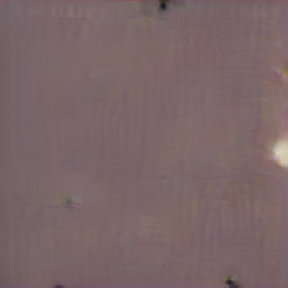

In [ ]:
#@markdown #**Fire up the AI**

#@markdown ---


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
if texts:
    print('Using texts:', texts)
if target_images:
    print('Using image prompts:', target_images)
if args.seed is None:
    seed = torch.seed()
else:
    seed = args.seed
torch.manual_seed(seed)
print('Using seed:', seed)

model = load_vqgan_model(args.vqgan_config, args.vqgan_checkpoint).to(device)
perceptor = clip.load(args.clip_model, jit=False)[0].eval().requires_grad_(False).to(device)

cut_size = perceptor.visual.input_resolution
if is_gumbel:
    e_dim = model.quantize.embedding_dim
else:
    e_dim = model.quantize.e_dim

f = 2**(model.decoder.num_resolutions - 1)
make_cutouts = MakeCutouts(cut_size, args.cutn, cut_pow=args.cut_pow)
if is_gumbel:
    n_toks = model.quantize.n_embed
else:
    n_toks = model.quantize.n_e

toksX, toksY = args.size[0] // f, args.size[1] // f
sideX, sideY = toksX * f, toksY * f
if is_gumbel:
    z_min = model.quantize.embed.weight.min(dim=0).values[None, :, None, None]
    z_max = model.quantize.embed.weight.max(dim=0).values[None, :, None, None]
else:
    z_min = model.quantize.embedding.weight.min(dim=0).values[None, :, None, None]
    z_max = model.quantize.embedding.weight.max(dim=0).values[None, :, None, None]

if args.init_image:
    pil_image = Image.open(args.init_image).convert('RGB')
    pil_image = pil_image.resize((sideX, sideY), Image.LANCZOS)
    z, *_ = model.encode(TF.to_tensor(pil_image).to(device).unsqueeze(0) * 2 - 1)
else:
    one_hot = F.one_hot(torch.randint(n_toks, [toksY * toksX], device=device), n_toks).float()
    if is_gumbel:
        z = one_hot @ model.quantize.embed.weight
    else:
        z = one_hot @ model.quantize.embedding.weight
    z = z.view([-1, toksY, toksX, e_dim]).permute(0, 3, 1, 2)
z_orig = z.clone()
z.requires_grad_(True)
opt = optim.Adam([z], lr=args.step_size)

normalize = transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                                 std=[0.26862954, 0.26130258, 0.27577711])

pMs = []

for prompt in args.prompts:
    txt, weight, stop = parse_prompt(prompt)
    embed = perceptor.encode_text(clip.tokenize(txt).to(device)).float()
    pMs.append(Prompt(embed, weight, stop).to(device))

for prompt in args.image_prompts:
    path, weight, stop = parse_prompt(prompt)
    img = resize_image(Image.open(path).convert('RGB'), (sideX, sideY))
    batch = make_cutouts(TF.to_tensor(img).unsqueeze(0).to(device))
    embed = perceptor.encode_image(normalize(batch)).float()
    pMs.append(Prompt(embed, weight, stop).to(device))

for seed, weight in zip(args.noise_prompt_seeds, args.noise_prompt_weights):
    gen = torch.Generator().manual_seed(seed)
    embed = torch.empty([1, perceptor.visual.output_dim]).normal_(generator=gen)
    pMs.append(Prompt(embed, weight).to(device))

def synth(z):
    if is_gumbel:
        z_q = vector_quantize(z.movedim(1, 3), model.quantize.embed.weight).movedim(3, 1)
    else:
        z_q = vector_quantize(z.movedim(1, 3), model.quantize.embedding.weight).movedim(3, 1)
    
    return clamp_with_grad(model.decode(z_q).add(1).div(2), 0, 1)

def add_xmp_data(nombrefichero):
    imagen = ImgTag(filename=nombrefichero)
    imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'creator', 'VQGAN+CLIP', {"prop_array_is_ordered":True, "prop_value_is_array":True})
    if args.prompts:
        imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'title', " | ".join(args.prompts), {"prop_array_is_ordered":True, "prop_value_is_array":True})
    else:
        imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'title', 'None', {"prop_array_is_ordered":True, "prop_value_is_array":True})
    imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'i', str(i), {"prop_array_is_ordered":True, "prop_value_is_array":True})
    imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'model', name_model, {"prop_array_is_ordered":True, "prop_value_is_array":True})
    imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'seed',str(seed) , {"prop_array_is_ordered":True, "prop_value_is_array":True})
    imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'input_images',str(input_images) , {"prop_array_is_ordered":True, "prop_value_is_array":True})
    #for frases in args.prompts:
    #    imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'Prompt' ,frases, {"prop_array_is_ordered":True, "prop_value_is_array":True})
    imagen.close()

def add_stegano_data(filename):
    data = {
        "title": " | ".join(args.prompts) if args.prompts else None,
        "notebook": "VQGAN+CLIP",
        "i": i,
        "model": name_model,
        "seed": str(seed),
        "input_images": input_images
    }
    lsb.hide(filename, json.dumps(data)).save(filename)

@torch.no_grad()
def checkin(i, losses):
    losses_str = ', '.join(f'{loss.item():g}' for loss in losses)
    tqdm.write(f'i: {i}, loss: {sum(losses).item():g}, losses: {losses_str}')
    out = synth(z)
    TF.to_pil_image(out[0].cpu()).save('progress.png')
    add_stegano_data('progress.png')
    add_xmp_data('progress.png')
    display.display(display.Image('progress.png'))

def ascend_txt():
    global i
    out = synth(z)
    iii = perceptor.encode_image(normalize(make_cutouts(out))).float()

    result = []

    if args.init_weight:
        result.append(F.mse_loss(z, z_orig) * args.init_weight / 2)

    for prompt in pMs:
        result.append(prompt(iii))
    img = np.array(out.mul(255).clamp(0, 255)[0].cpu().detach().numpy().astype(np.uint8))[:,:,:]
    img = np.transpose(img, (1, 2, 0))
    filename = f"steps/{i:04}.png"
    imageio.imwrite(filename, np.array(img))
    add_stegano_data(filename)
    add_xmp_data(filename)
    return result

def train(i):
    opt.zero_grad()
    lossAll = ascend_txt()
    if i % args.display_freq == 0:
        checkin(i, lossAll)
    loss = sum(lossAll)
    loss.backward()
    opt.step()
    with torch.no_grad():
        z.copy_(z.maximum(z_min).minimum(z_max))

i = 0
try:
    with tqdm() as pbar:
        while True:
            train(i)
            if i == max_iterations:
                break
            i += 1
            pbar.update()
except KeyboardInterrupt:
    pass

In [ ]:
#@markdown **Generate a video with the result (You can edit frame rate and stuff by double-clicking this tab)**
init_frame = 1 #This is the frame where the video will start
last_frame = i #You can change i to the number of the last frame you want to generate. It will raise an error if that number of frames does not exist.

min_fps = 10
max_fps = 30

total_frames = last_frame-init_frame

length = 15 #Desired video time in seconds

frames = []
tqdm.write('Generating video...')
for i in range(init_frame,last_frame): #
    filename = f"steps/{i:04}.png"
    frames.append(Image.open(filename))

#fps = last_frame/10
fps = np.clip(total_frames/length,min_fps,max_fps)

from subprocess import Popen, PIPE
p = Popen(['ffmpeg', '-y', '-f', 'image2pipe', '-vcodec', 'png', '-r', str(fps), '-i', '-', '-vcodec', 'libx264', '-r', str(fps), '-pix_fmt', 'yuv420p', '-crf', '17', '-preset', 'veryslow', 'video.mp4'], stdin=PIPE)
for im in tqdm(frames):
    im.save(p.stdin, 'PNG')
p.stdin.close()

print("The video is now being compressed, wait...")
p.wait()
print("The video is ready")

In [ ]:
#@markdown **View video in browser**

# @markdown *This process may take a little longer. If you don't want to wait, download it by executing the next cell instead of using this cell.*
mp4 = open('video.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
display.HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
#@markdown #**Download the result video**
from google.colab import files
files.download("video.mp4")

**Delete all frames from folder**

In [ ]:
#@markdown Run this tab if you wanna clear all the genarated frames images


%cd content/steps
%rm *.png
%cd ..

JS to prevent idle timeout:

Press F12 OR CTRL + SHIFT + I OR right click on this website -> inspect.
Then click on the console tab and paste in the following code.

```javascript
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}
setInterval(ClickConnect,60000)
```